In [63]:
import pandas as pd
import numpy as np 
from sklearn import pipeline, preprocessing, metrics, model_selection, ensemble
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [64]:
data_set = pd.read_csv('RebateModelData.csv')
# data_set
# data_set.isnull().sum()

In [65]:
X = ['QUANTITY', 'FINAL_REVENUE', 'LIST_PRICE']
Y = ['REBATES'] 

In [66]:
# train, test = train_test_split(data_set, test_size=0.205878, random_state=None, shuffle=False)
train, test = train_test_split(data_set, test_size=0.1, random_state=None, shuffle=False)

In [67]:
train[X] = train[X] / train[X].max()

In [68]:
test = test[:1000]

In [69]:
test[X] = test[X] / test[X].max()
# test[X] = test[X] / X_max

In [70]:
data_mapper = DataFrameMapper([
                             (['QUANTITY', 'FINAL_REVENUE', 'LIST_PRICE'], preprocessing.StandardScaler()),
                             ])

In [71]:
pipeline_obj = pipeline.Pipeline([
        ('mapper', data_mapper),
        ("model", ensemble.RandomForestRegressor())
    ])

In [72]:
# data_set.columns

In [73]:
pipeline_obj.fit(train[X], train[Y])

C:\Users\azaincharolia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['QUANTITY', 'FINAL_REVENUE',
                                             'LIST_PRICE'],
                                            StandardScaler())])),
                ('model', RandomForestRegressor())])

In [74]:
# result_test = pipeline_obj.predict(test[X]) * Y_max.values
result_test = pipeline_obj.predict(test[X])

In [75]:
# result_test

In [76]:
mse_discount = metrics.mean_squared_error(test[Y].values, result_test)
mse_discount

3.383039015480302

In [77]:
# mse_rebate = metrics.mean_squared_error(test[Y].values[:,1], result_test[:,1])
# mse_rebate

In [78]:
mae_discount = metrics.mean_absolute_error(test[Y].values, result_test)
mae_discount

1.3727919228647802

In [79]:
# mae_rebate = metrics.mean_absolute_error(test[Y].values[:,1], result_test[:,1])
# mae_rebate

In [80]:
# plt.plot(result_test)

In [81]:
# plt.plot(test[Y].values)

Text(0.5, 1.0, 'Rebates')

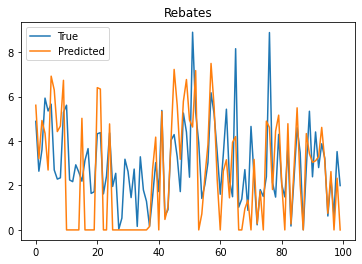

In [82]:
plt.figure()
plt.plot(result_test[:100])
plt.plot(test[Y].values[:100])
plt.legend(['True', 'Predicted'])
plt.title('Rebates')

In [83]:
# plt.figure()
# plt.plot(result_test[:100,1])
# plt.plot(test[Y].values[:100,1])
# plt.legend(['True', 'Predicted'])
# plt.title('Rebate')

Text(0.5, 1.0, 'Rebates')

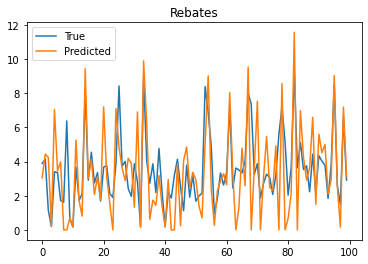

In [84]:
plt.figure()
plt.plot(result_test[-100:])
plt.plot(test[Y].values[-100:])
plt.legend(['True', 'Predicted'])
plt.title('Rebates')

In [85]:
# plt.figure()
# plt.plot(result_test[-100:,1])
# plt.plot(test[Y].values[-100:,1])
# plt.legend(['True', 'Predicted'])
# plt.title('Rebate')

In [86]:
import joblib

In [87]:
joblib.dump(pipeline_obj, 'RFModelForRebate.pkl')

['RFModelForRebate.pkl']

In [88]:
model_test = joblib.load('RFModelForRebate.pkl')

In [89]:
model_test.predict(data_set[X])

array([5.01624611, 5.01624611, 5.01624611, ..., 5.01624611, 5.01624611,
       5.01624611])

In [90]:
# ['QUANTITY', 'FINAL_REVENUE', 'DISCOUNT', 'REBATES', 'LIST_PRICE', 'RATE', 'SALE_PRICE', 'TOTAL_COST']

my_dict = {}
my_dict['QUANTITY'] = 1
my_dict['FINAL_REVENUE'] = 2
my_dict['LIST_PRICE'] = 3

In [91]:
testData = pd.DataFrame({'x':my_dict}).transpose()

In [92]:
testData

,FINAL_REVENUE,LIST_PRICE,QUANTITY
x,2,3,1


In [93]:
model_test.predict(testData)[0]

5.0162461108